Importing Libraries

In [68]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Data Preprocessing

Training Image Preprocessing

In [69]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


Validation Image Preprocessing

In [70]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


Building Model

In [71]:
cnn = tf.keras.models.Sequential()

Building Convolutional Layer

In [72]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [73]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [74]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [75]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [76]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [77]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [78]:
cnn.add(tf.keras.layers.Flatten())

In [79]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [80]:
cnn.add(tf.keras.layers.Dropout(0.4))#To avoid overfitting

In [81]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

Compiling and Training Phase

In [82]:
cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [83]:
cnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [84]:
tf.keras.layers.Conv2D(filters=512, kernel_size=(3, 3), padding="same")


<Conv2D name=conv2d_43, built=False>

In [85]:
tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1))


<MaxPooling2D name=max_pooling2d_23, built=True>

In [86]:
tf.keras.layers.GlobalAveragePooling2D()


<GlobalAveragePooling2D name=global_average_pooling2d_3, built=True>

In [ ]:
import os
import tensorflow as tf

# Paths
checkpoint_path = "trained_plant_disease_model/cp.weights.h5"
checkpoint_dir = os.path.dirname(checkpoint_path)
epoch_tracker_path = os.path.join(checkpoint_dir, "last_epoch.txt")
os.makedirs(checkpoint_dir, exist_ok=True)

# Load model here (you must have 'cnn' defined)
# cnn = ...

# Load previous weights if they exist
if os.path.exists(checkpoint_path):
    print("🔄 Loading weights from previous checkpoint...")
    cnn.load_weights(checkpoint_path)

def load_last_epoch(path):
    if os.path.exists(path):
        with open(path, "r") as f:
            return int(f.read()) + 1
    return 0

def save_epoch(epoch, path):
    with open(path, "w") as f:
        f.write(str(epoch))

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    save_best_only=False,
    verbose=1
)

epoch_callback = tf.keras.callbacks.LambdaCallback(
    on_epoch_end=lambda epoch, logs: save_epoch(epoch, epoch_tracker_path)
)

initial_epoch = load_last_epoch(epoch_tracker_path)
print(f"🔁 Resuming training from epoch {initial_epoch}")

# Make sure training_set and validation_set are defined above
training_history = cnn.fit(
    x=training_set,
    validation_data=validation_set,
    epochs=10,
    initial_epoch=initial_epoch,
    callbacks=[checkpoint_callback, epoch_callback]
)


Evaluating Model

In [ ]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1611s 733ms/step - accuracy: 0.9855 - loss: 0.0481
Training accuracy: 0.9863575100898743


In [ ]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)


550/550 ━━━━━━━━━━━━━━━━━━━━ 313s 570ms/step - accuracy: 0.9609 - loss: 0.1374
Validation accuracy: 0.9601638913154602


Saving Model

In [ ]:
cnn.save('trained_plant_disease_model.keras')

In [ ]:
training_history.history #Return Dictionary of history

{'accuracy': [0.6080090999603271,
  0.8630058765411377,
  0.9151291251182556,
  0.9393982291221619,
  0.9559854865074158,
  0.9644640684127808,
  0.9703108072280884,
  0.9752044677734375,
  0.9801550507545471,
  0.981492280960083],
 'loss': [1.3352380990982056,
  0.43236175179481506,
  0.2636261284351349,
  0.18600286543369293,
  0.13782566785812378,
  0.10831674933433533,
  0.08962219953536987,
  0.07458171993494034,
  0.061741430312395096,
  0.056966885924339294],
 'val_accuracy': [0.8549396991729736,
  0.9035966396331787,
  0.9263601303100586,
  0.9499203562736511,
  0.9616435170173645,
  0.9603345990180969,
  0.9653425812721252,
  0.9578306674957275,
  0.957659900188446,
  0.9601638913154602],
 'val_loss': [0.4648486375808716,
  0.29325151443481445,
  0.22799023985862732,
  0.14755167067050934,
  0.12072686105966568,
  0.12175516039133072,
  0.11684736609458923,
  0.1358972191810608,
  0.14077940583229065,
  0.13704761862754822]}

In [ ]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [ ]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


Accuracy Visualization

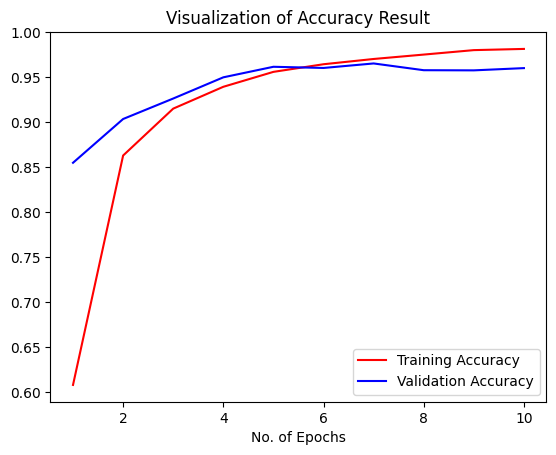

In [ ]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

Some other metrics for model evaluation

In [88]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [91]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [92]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 673s 38ms/step


In [93]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [94]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], shape=(17572,))>

In [95]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], shape=(17572,))>

In [96]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [97]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.68      0.52      0.59       504
                                 Apple___Black_rot       0.73      0.39      0.51       497
                          Apple___Cedar_apple_rust       0.46      0.78      0.58       440
                                   Apple___healthy       0.56      0.52      0.54       502
                               Blueberry___healthy       0.64      0.55      0.59       454
          Cherry_(including_sour)___Powdery_mildew       0.69      0.37      0.49       421
                 Cherry_(including_sour)___healthy       0.50      0.93      0.65       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.78      0.52      0.63       410
                       Corn_(maize)___Common_rust_       0.92      0.94      0.93       477
               Corn_(maize)___Northern_Leaf_Blight       0.75      0.78      0.

Confusion Matrix Calculations

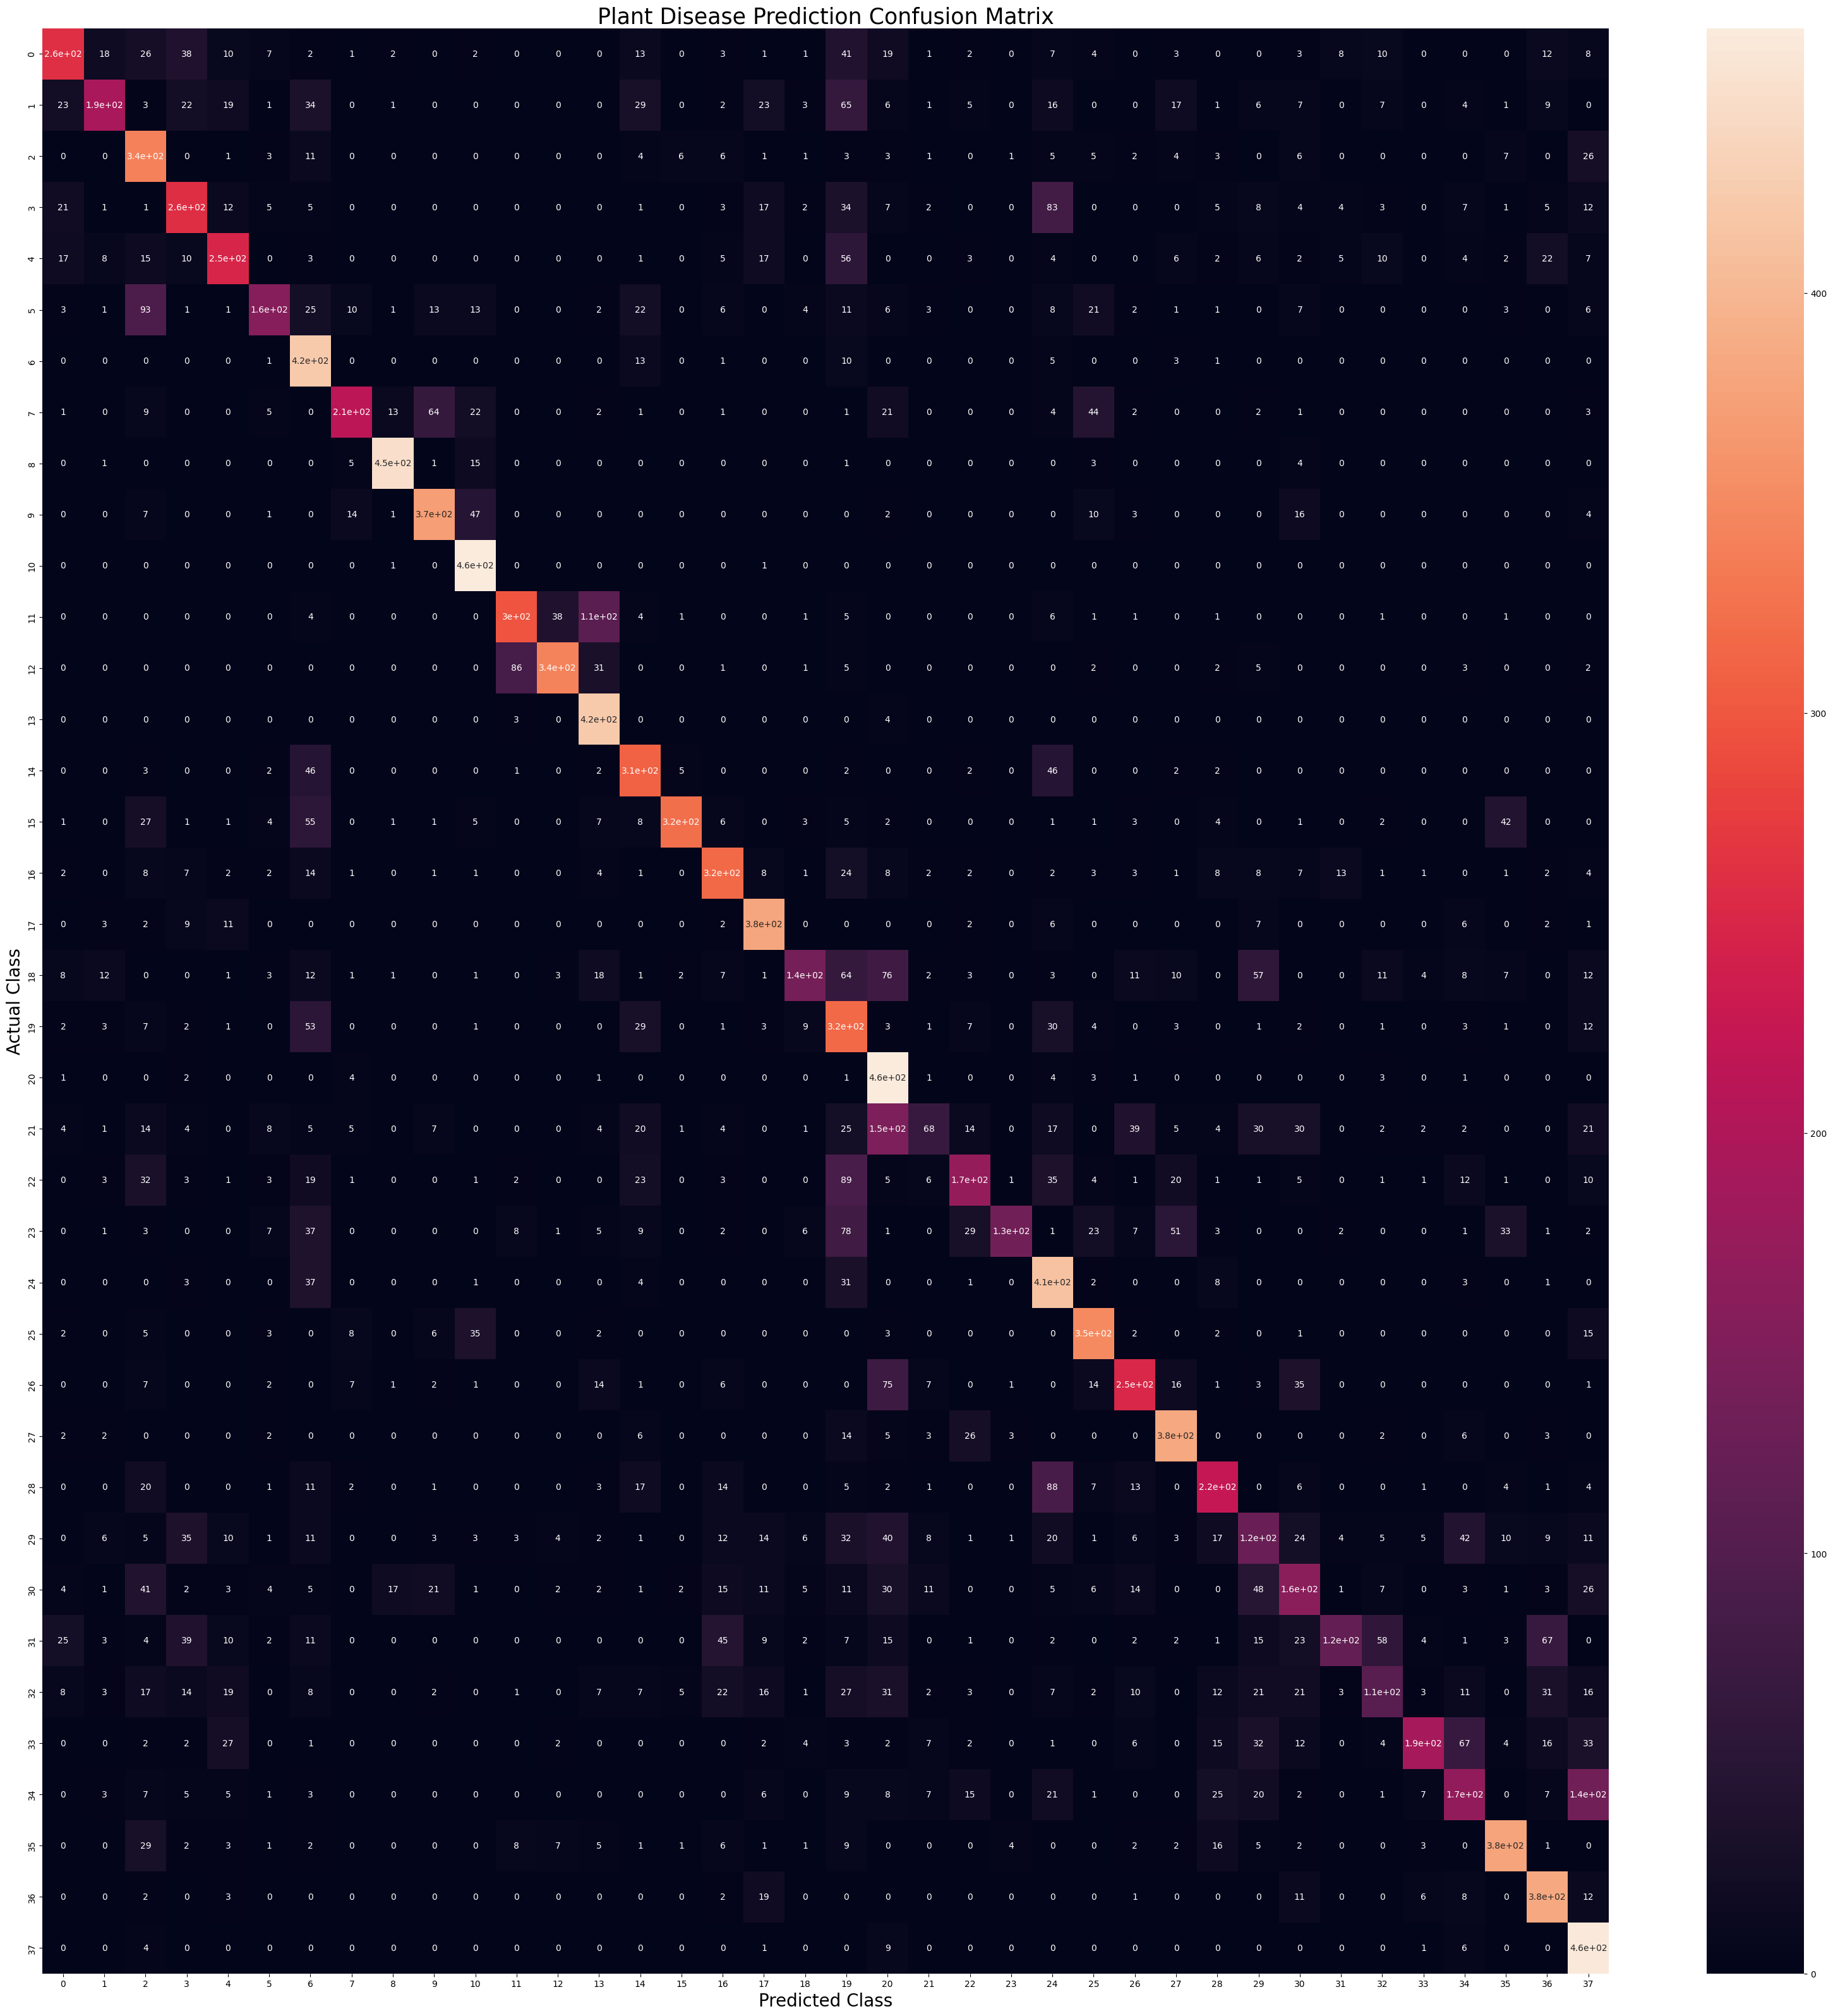

In [98]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()